In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DATA_PATH = 'C:\\names\\'

In [5]:
def get_names(step):
    names_by_year = {}
    for year in range(1900, 2001, step):
        names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year), names = ['Name', 'Gender', 'Count'])
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

In [6]:
def get_two_names(step):
    two_names = get_names(step).query('Name == ["Ruth", "Robert"]')
    two_names_dynamics = two_names.groupby([two_names.index.get_level_values(0), 'Name']).sum().unstack('Name')
    return two_names_dynamics

## 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000:

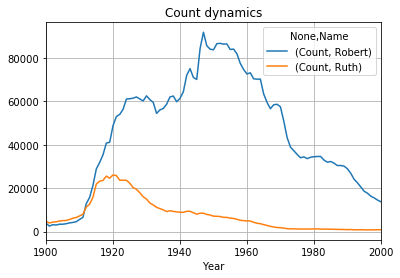

In [7]:
get_two_names(1).plot(title='Count dynamics', grid = True)

## 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000):

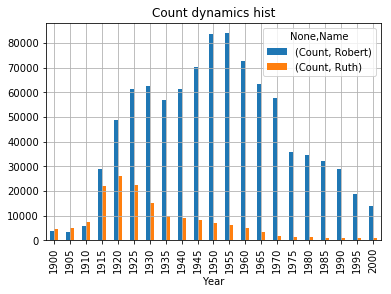

In [8]:
get_two_names(5).plot.bar(title='Count dynamics hist', grid = True)

## 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год:

In [9]:
names_1950 = pd.read_csv(DATA_PATH + 'yob1950.txt', names=['Name', 'Gender', 'Count'] )
names_1950.head(10)

,Name,Gender,Count
0,Linda,F,80439
1,Mary,F,65485
2,Patricia,F,47948
3,Barbara,F,41559
4,Susan,F,38019
5,Nancy,F,29619
6,Deborah,F,29067
7,Sandra,F,28896
8,Carol,F,26163
9,Kathleen,F,25704


In [10]:
names_1950_R = names_1950[(names_1950.Name.str.startswith('R'))]
names_dynamics_1950_R = names_1950_R.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_dynamics_1950_R

,Count
Name,
Robert,83778
Richard,51111
Ronald,29985
Roger,12578
Raymond,11218
Rebecca,9443
Ruth,7138
Roy,6491
Rita,6439


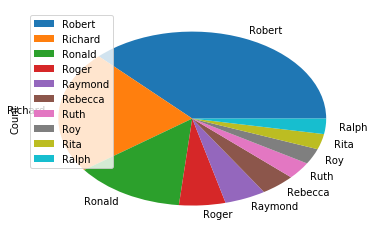

In [11]:
names_dynamics_1950_R.plot.pie(y='Count')

## 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [12]:
names_all = get_names(1)

In [17]:
def count_cons(word):
    vowels = 0
    consonants = 0
    for letter in word:
        if letter.isalpha():
            if letter.lower() in 'aeiouy':
                vowels += 1
            else:
                consonants += 1
        else:
            pass
 
    return consonants

In [18]:
names_all['Count_cons'] = names_all.apply(lambda row: count_cons(row.Name), axis=1)
names_all.head(10)

Name Gender  Count  Count_cons
Year Pos                                     
1900 0         Mary      F  16706           2
     1        Helen      F   6343           3
     2         Anna      F   6114           2
     3     Margaret      F   5304           5
     4         Ruth      F   4765           3
     5    Elizabeth      F   4096           5
     6     Florence      F   3920           5
     7        Ethel      F   3896           3
     8        Marie      F   3856           2
     9      Lillian      F   3414           4

In [20]:
all_names_cos_count = names_all.groupby('Count_cons').sum().sort_values(by='Count', ascending=False)
all_names_cos_count.head(30)

,Count
Count_cons,
3,98123844
4,85093088
2,48248189
5,35925676
1,5141925
6,4040995
8,1777545
7,149035
0,3151


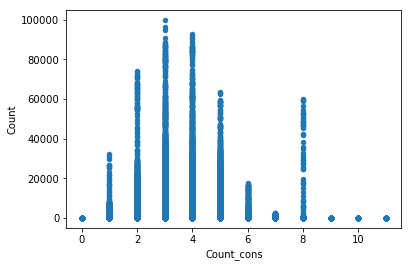

In [19]:
names_all.plot.scatter(x='Count_cons', y='Count')